# Countries Economies, GDP, Migration and Population Analysis
#### by Michail Pliuscik

## Questions:
- Which are the countries with highest GDP?
- How Literacy is related to Migration?
- How GDP and affects migration?
- What are Birthrate and deathrate statistics across the world?
- Is the a relationship between GDP and birthrate?

### I will be worrking with a dataset from Kaggle which can be found here: https://www.kaggle.com/datasets/darshanprabhu09/countries-economy-gdp-and-everything




In [1114]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading DataSet

- Checking column heading and deciding wich data is relevant to the analysis
- Familiarising with data structure


In [1115]:
# Reading a file using pandas
df = pd.read_csv("countries_of_the_world.csv")
print(f"\nFamiliarising ourselves with the dataset structure; dataset has {df.shape[1]} columns and {df.shape[0]} rows\n")
df.head()


Familiarising ourselves with the dataset structure; dataset has 20 columns and 227 rows



,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [1116]:
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

# Data Cleaning

- Renaming columns fo easier user
- Checking data types
- Making sure that relevant data is presented in correct format
- Checking for null values and deciding how to proceed with them

In [1117]:
# Creating simpliefied column names
df.rename(columns={'Area (sq. mi.)': 'Area',
       'Pop. Density (per sq. mi.)': 'Pop_Density', 'Coastline (coast/area ratio)': 'Coastline',
       'Net migration': 'Net_Migration', 'Infant mortality (per 1000 births)': 'Infant_Mortality',
       'GDP ($ per capita)': 'GDP', 'Literacy (%)': 'Literacy', 'Phones (per 1000)': 'Phones', 'Arable (%)': 'Arable',
       'Crops (%)': 'Crops', 'Other (%)': 'Other'}, inplace=True)

In [1118]:
# Checking data types
df.dtypes

Country              object
Region               object
Population            int64
Area                  int64
Pop_Density          object
Coastline            object
Net_Migration        object
Infant_Mortality     object
GDP                 float64
Literacy             object
Phones               object
Arable               object
Crops                object
Other                object
Climate              object
Birthrate            object
Deathrate            object
Agriculture          object
Industry             object
Service              object
dtype: object

In [1119]:
# Some of the columns have object data type, casting them to float so we could aggregate them later
df = df.replace(',', '.', regex=True)
df[['Literacy', 'Birthrate', 'Deathrate', 'Net_Migration', 'Phones', 'Industry', 'Service']] = df[['Literacy', 'Birthrate', 'Deathrate', 'Net_Migration', 'Phones', 'Industry', 'Service']].astype(float)

In [1120]:
# Selecting column we going to be working with
df = df[['Population', 'Area', 'Net_Migration', 'GDP', 'Literacy', 'Phones', 'Birthrate', 'Deathrate', 'Country', 'Region', 'Industry', 'Service']]

In [1121]:
# Cleaning values from spaces to make them more readable
df['Region'] = df['Region'].str.rstrip()
df['Region'].unique()

array(['ASIA (EX. NEAR EAST)', 'EASTERN EUROPE', 'NORTHERN AFRICA',
       'OCEANIA', 'WESTERN EUROPE', 'SUB-SAHARAN AFRICA',
       'LATIN AMER. & CARIB', 'C.W. OF IND. STATES', 'NEAR EAST',
       'NORTHERN AMERICA', 'BALTICS'], dtype=object)

In [1122]:
# Separating columns and checking for null values
num_vars = df.columns[df.dtypes != 'object']
cat_vars = df.columns[df.dtypes == 'object']
print(num_vars)
print(cat_vars)

Index(['Population', 'Area', 'Net_Migration', 'GDP', 'Literacy', 'Phones',
       'Birthrate', 'Deathrate', 'Industry', 'Service'],
      dtype='object')
Index(['Country', 'Region'], dtype='object')


In [1123]:
df[num_vars].isnull().sum().sort_values(ascending=False)/df.shape[0]

Literacy         0.079295
Industry         0.070485
Service          0.066079
Phones           0.017621
Deathrate        0.017621
Net_Migration    0.013216
Birthrate        0.013216
GDP              0.004405
Population       0.000000
Area             0.000000
dtype: float64

In [1124]:
df[cat_vars].isnull().sum().sort_values(ascending=False)/df.shape[0]

Country    0.0
Region     0.0
dtype: float64

In [1125]:
# Checking 'Region' column
df['Region'].unique()

array(['ASIA (EX. NEAR EAST)', 'EASTERN EUROPE', 'NORTHERN AFRICA',
       'OCEANIA', 'WESTERN EUROPE', 'SUB-SAHARAN AFRICA',
       'LATIN AMER. & CARIB', 'C.W. OF IND. STATES', 'NEAR EAST',
       'NORTHERN AMERICA', 'BALTICS'], dtype=object)

#### Decided that more accurate representation would be a mean based on a region 

In [1126]:
# Filling missing values with means by region
means_by_region = df.groupby('Region')[num_vars].transform('mean')
df[num_vars] = df[num_vars].fillna(means_by_region)

df[num_vars].isnull().sum().sort_values(ascending=False)/df.shape[0]

Population       0.0
Area             0.0
Net_Migration    0.0
GDP              0.0
Literacy         0.0
Phones           0.0
Birthrate        0.0
Deathrate        0.0
Industry         0.0
Service          0.0
dtype: float64

In [1127]:
# A quick view of the table after completing cleaning
df.head()

,Population,Area,Net_Migration,GDP,Literacy,Phones,Birthrate,Deathrate,Country,Region,Industry,Service
0,31056997,647500,23.06,700.0,36.0,3.2,46.60,20.34,Afghanistan,ASIA (EX. NEAR EAST),0.240000,0.380000
1,3581655,28748,-4.93,4500.0,86.5,71.2,15.11,5.22,Albania,EASTERN EUROPE,0.188000,0.579000
2,32930091,2381740,-0.39,6000.0,70.0,78.1,17.14,4.61,Algeria,NORTHERN AFRICA,0.600000,0.298000
3,57794,199,-20.71,8000.0,97.0,259.5,22.46,3.27,American Samoa,OCEANIA,0.215250,0.608938
4,71201,468,6.60,19000.0,100.0,497.2,8.71,6.25,Andorra,WESTERN EUROPE,0.246083,0.714625


# Analysis

- Using correlation function to detect any dependencies in numerical values across the dataset.
- Visualising correlation data with the help of heatmap


<Axes: >

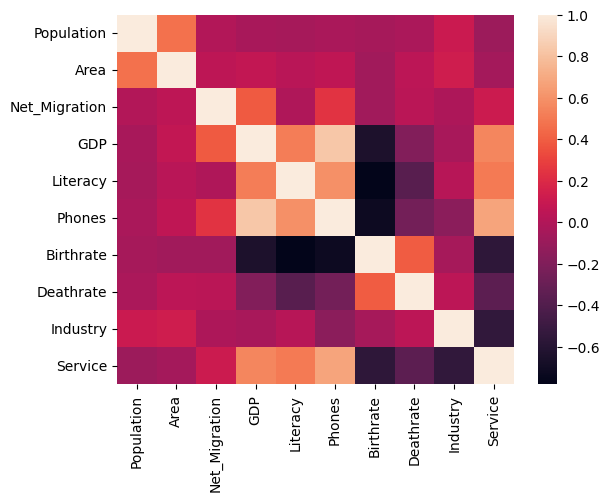

In [1128]:
# Let's use correlation analysis to check if we can find any dependencies.
corr_matrix = df[num_vars].corr()
sns.heatmap(data=corr_matrix)

#### The correlation coefficient measures the strength and direction of the relationship between two variables. It ranges from -1 to 1. A positive value indicates a positive correlation, meaning the variables move in the same direction. A negative value indicates a negative correlation, meaning the variables move in opposite directions. The closer the value is to -1 or 1, the stronger the correlation. A value close to 0 suggests a weak or no correlation.

#### We can observe strong positive correlation betweeen GDP, Phones, Services, Net_Migration, Literacy. Also, we can see Strong Negative correlation between Birthrate, GDP, Literacy, Phones and Services

## Which of the world's region has highest Literacy?

In [1129]:
df.groupby('Region')[num_vars].mean().sort_values(by='Literacy', ascending=False)

,Population,Area,Net_Migration,GDP,Literacy,Phones,Birthrate,Deathrate,Industry,Service
Region,,,,,,,,,,
BALTICS,2.394991e+06,5.833833e+04,-2.033333,11300.000000,99.733333,292.866667,9.343333,12.630000,0.293333,0.661667
C.W. OF IND. STATES,2.334013e+07,1.841737e+06,-2.033333,4000.000000,98.725000,163.850000,17.855833,10.341667,0.328000,0.480167
WESTERN EUROPE,1.415500e+07,1.325171e+05,3.321429,27046.428571,98.391304,593.807143,10.553571,9.354643,0.246083,0.714625
NORTHERN AMERICA,6.633446e+07,4.356494e+06,-0.274000,26100.000000,97.750000,686.740000,13.154000,7.694000,0.199333,0.787000
EASTERN EUROPE,9.992893e+06,9.601850e+04,-0.647500,9808.333333,97.088889,280.750000,10.370909,10.284545,0.309250,0.598667
LATIN AMER. & CARIB,1.248499e+07,4.565352e+05,-1.494444,8682.222222,90.654545,271.661364,19.081111,6.376000,0.256116,0.650721
OCEANIA,1.577698e+06,4.057053e+05,-2.060526,8247.619048,88.835294,189.885714,22.108000,5.810526,0.215250,0.608938
ASIA (EX. NEAR EAST),1.317137e+08,8.248826e+05,1.372500,8053.571429,79.553571,171.159259,21.157857,7.637143,0.302143,0.520107
NEAR EAST,1.219177e+07,2.722241e+05,2.650000,10456.250000,79.521429,209.113333,25.031875,4.809375,0.406000,0.530000


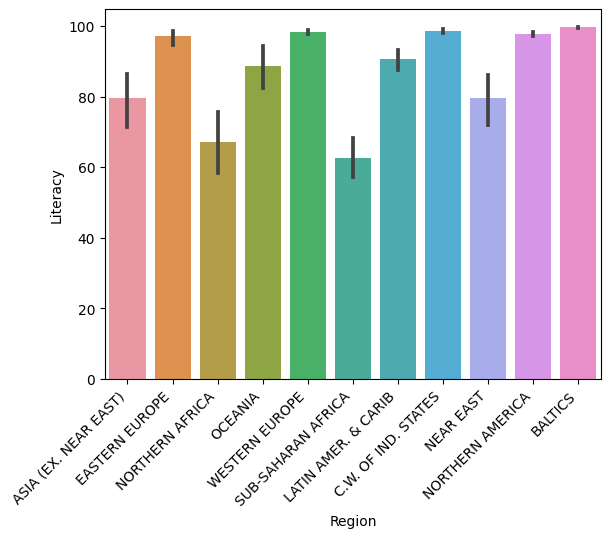

In [1130]:
sns.barplot(x='Region', y='Literacy', data=df)
ax = plt.gca()
# Reposition the x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
# Display the plot
plt.show()

In [1131]:
# Displaying top 10 counties with high Literacy by country
df.sort_values(by='Literacy', ascending=False).head(10)

,Population,Area,Net_Migration,GDP,Literacy,Phones,Birthrate,Deathrate,Country,Region,Industry,Service
119,33987,160,4.85,25000.0,100.0,585.5,10.21,7.18,Liechtenstein,WESTERN EUROPE,0.390000,0.550000
11,20264082,7686850,3.98,29000.0,100.0,565.5,12.14,7.51,Australia,OCEANIA,0.262000,0.700000
154,4610820,323802,1.74,37800.0,100.0,461.7,11.46,9.40,Norway,WESTERN EUROPE,0.415000,0.564000
121,474413,2586,8.97,55100.0,100.0,515.4,11.94,8.41,Luxembourg,WESTERN EUROPE,0.130000,0.860000
4,71201,468,6.60,19000.0,100.0,497.2,8.71,6.25,Andorra,WESTERN EUROPE,0.246083,0.714625
68,5231372,338145,0.95,27400.0,100.0,405.3,10.45,9.86,Finland,WESTERN EUROPE,0.295000,0.676000
54,5450661,43094,2.48,31100.0,100.0,614.6,11.13,10.36,Denmark,WESTERN EUROPE,0.246000,0.735000
53,10235455,78866,0.97,15700.0,99.9,314.3,9.02,10.59,Czech Republic,EASTERN EUROPE,0.393000,0.573000
93,299388,103000,2.38,30900.0,99.9,647.7,13.64,6.72,Iceland,WESTERN EUROPE,0.150000,0.765000
163,38536869,312685,-0.49,11100.0,99.8,306.3,9.85,9.89,Poland,EASTERN EUROPE,0.311000,0.640000


#### 80% of the countries in the world with high literacy are in Western Europe

## Which of the world's region has highest GDP?

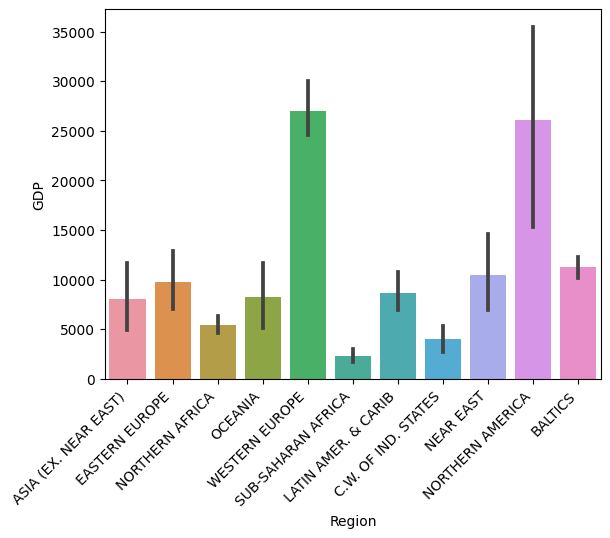

In [1132]:
# Visualising world regions by GDP
sns.barplot(x='Region', y='GDP', data=df)

ax = plt.gca()

# Reposition the x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Display the plot
plt.show()

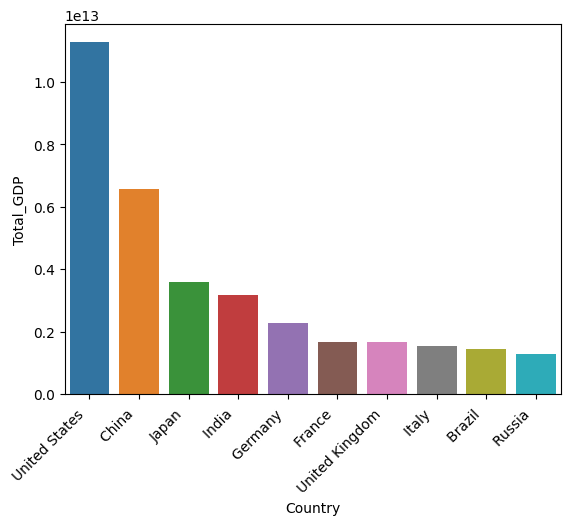

In [1133]:
# Displaying top 10 countries by GDP
df['Total_GDP'] = df['Population'] * df['GDP']
total_gdp_df = df.sort_values(by='Total_GDP', ascending=False).iloc[:10]
sns.barplot(x='Country', y='Total_GDP', data=total_gdp_df)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

## Which of the world's region has highest Migration?

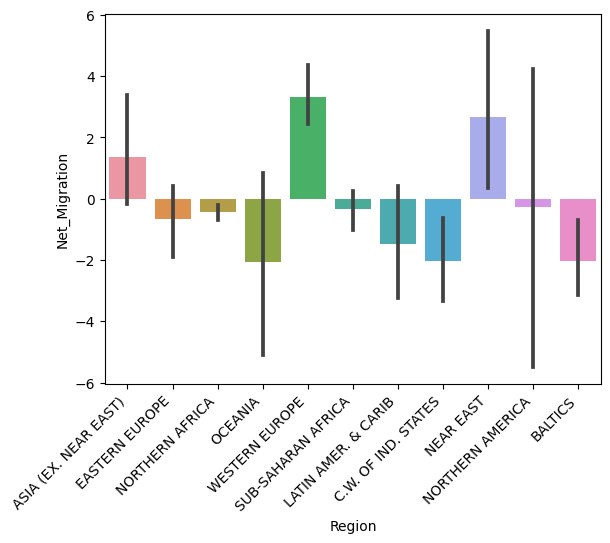

In [1134]:
# Visualising Net Migratiion by Region
sns.barplot(x='Region', y='Net_Migration', data=df)
ax = plt.gca()

# Reposition the x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Display the plot
plt.show()

#### Errorbar indicates that Migration in some regions are happening within the actual region. A good example is 'Northern America'; although Canada and USA have a very high potivie migration score some of the counties whinin the same 'Northern America' have a very high negative Migration score.

In [1135]:
df[df['Region'] == 'NORTHERN AMERICA'].sort_values(by='Net_Migration', ascending=False)

,Population,Area,Net_Migration,GDP,Literacy,Phones,Birthrate,Deathrate,Country,Region,Industry,Service,Total_GDP
36,33098932,9984670,5.96,29800.0,97.00,552.2,10.78,7.80,Canada,NORTHERN AMERICA,0.294000,0.684,9.863482e+11
214,298444215,9631420,3.41,37800.0,97.00,898.0,14.14,8.26,United States,NORTHERN AMERICA,0.204000,0.787,1.128119e+13
22,65773,53,2.49,36000.0,98.00,851.4,11.40,7.74,Bermuda,NORTHERN AMERICA,0.100000,0.890,2.367828e+09
174,7026,242,-4.86,6900.0,99.00,683.2,13.52,6.83,St Pierre & Miquelon,NORTHERN AMERICA,0.199333,0.787,4.847940e+07
80,56361,2166086,-8.37,20000.0,97.75,448.9,15.93,7.84,Greenland,NORTHERN AMERICA,0.199333,0.787,1.127220e+09


## What is overall situation with Birthrate and Deathrate?

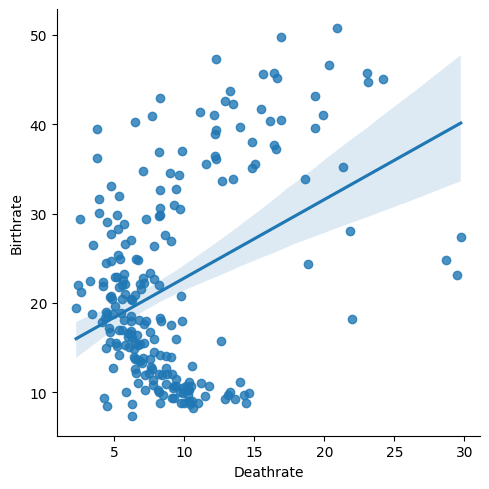

In [1136]:
# Visualising realationship between Deathrate and Birthrate to distinguish general situation around the world
sns.lmplot(x='Deathrate', y='Birthrate', data=df)

#### Main concentration of the countries are in the lower left corner where there is a low Deathrate but also the low Birthrate

In [1137]:
# Calculating what is a percentage of countries where Deathrate is hifger than Birthrate
depop = df[(df['Birthrate'] < df['Deathrate'])]
depop_countries =  depop.shape[0] * 100 / df.shape[0]
print(f"{round(depop_countries)} % of the countries has a depopulation crisis where are more deaths than people are born.")

11 % of the countries has a depopulation crisis where are more deaths than people are born.


In [1138]:
# Checking which are the countries facing depopulation
depop.sort_values(by='Deathrate').groupby('Region').size().reset_index(name='Count').sort_values(by='Count', ascending=False)

,Region,Count
4,WESTERN EUROPE,8
2,EASTERN EUROPE,7
3,SUB-SAHARAN AFRICA,4
0,BALTICS,3
1,C.W. OF IND. STATES,3


#### Most of the countries experiencing depopulation are in Europe

## What is correlaction between GDP and Birhtrate?

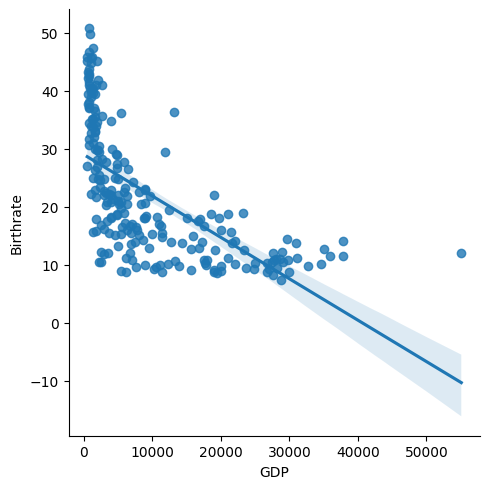

In [1139]:
# Visualising correlation between GDP and Birthrate
sns.lmplot(x='GDP', y='Birthrate', data=df)

#### Clear trendline where high GDP correlates to low Birthrate

# Conclusion

- <b> Which are the countries with highest GDP?
    - USA, Chine, Japan,India, Germany, France, UK, Italy, Brazil, Russia
    - Majority of the countries are in the Western Europe, along with a couple of countries from Asia and USA in North America
    <b>

- <b> How Literacy is related to Migration?
    - Most countries with high Literacy scores are concentrated in Western Europe.
    - Judging from the correlation results and migration chart there are no strong dependencies between Literacy and Migration.
    - People are migrating from the countries with low and high literacy. 
    <b>



- <b> How GDP and affects migration?
    - Countries with high GDP have a higher positive Migration score.
    <b>

- <b> What are Birthrate and deathrate statistics across the world?
    - High concentration of the countries with low Deathrate and slightly higher Birthrate
    - 11% of the world countries are facing depopulation
    - 72% of the counties that have population decline are in Europe
    <b>


- <b> Is the a relationship between GDP and birthrate?
    - As the heatmap data suggests there is a strong negative correlation between GDP and birthrate
    - Countries with lower GDP tend to have a higher Birthrate
    - As the GDP grows birthrate drops that suggests a change of lifestyle and adoption of new values and priorities
    <b>